In [1]:
import easyocr
import json
import os

# === Cấu hình thư mục ===
INPUT_FOLDER = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/converted_pngs"
OUTPUT_FOLDER = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR"

# Tạo thư mục output nếu chưa có
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Khởi tạo OCR reader
reader = easyocr.Reader(['vi'])

# Lặp qua tất cả ảnh .png
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith(".png"):
        image_path = os.path.join(INPUT_FOLDER, filename)
        base_name = os.path.splitext(filename)[0]
        output_json = os.path.join(OUTPUT_FOLDER, base_name + ".json")

        print(f"🔍 OCR đang xử lý: {filename}")

        try:
            results = reader.readtext(image_path)

            tokens = []
            for (bbox, text, prob) in results:
                x0 = int(bbox[0][0])
                y0 = int(bbox[0][1])
                x1 = int(bbox[2][0])
                y1 = int(bbox[2][1])
                tokens.append({
                    "text": text,
                    "bbox": [x0, y0, x1, y1]
                })

            with open(output_json, "w", encoding="utf-8") as f:
                json.dump(tokens, f, ensure_ascii=False, indent=2)

            print(f"✅ Đã lưu: {output_json}")
        except Exception as e:
            print(f"❌ Lỗi với {filename}: {e}")


🔍 OCR đang xử lý: 01GTKT0_0003263.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/01GTKT0_0003263.json
🔍 OCR đang xử lý: 01GTKT0_0003273.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/01GTKT0_0003273.json
🔍 OCR đang xử lý: 01GTKT0_0003722.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/01GTKT0_0003722.json
🔍 OCR đang xử lý: 1C22THS_00000212.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/1C22THS_00000212.json
🔍 OCR đang xử lý: 1C22THS_00000402.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/1C22THS_00000402.json
🔍 OCR đang xử lý: 1C22THS_00000432.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/1C22THS_00000432.json
🔍 OCR đang

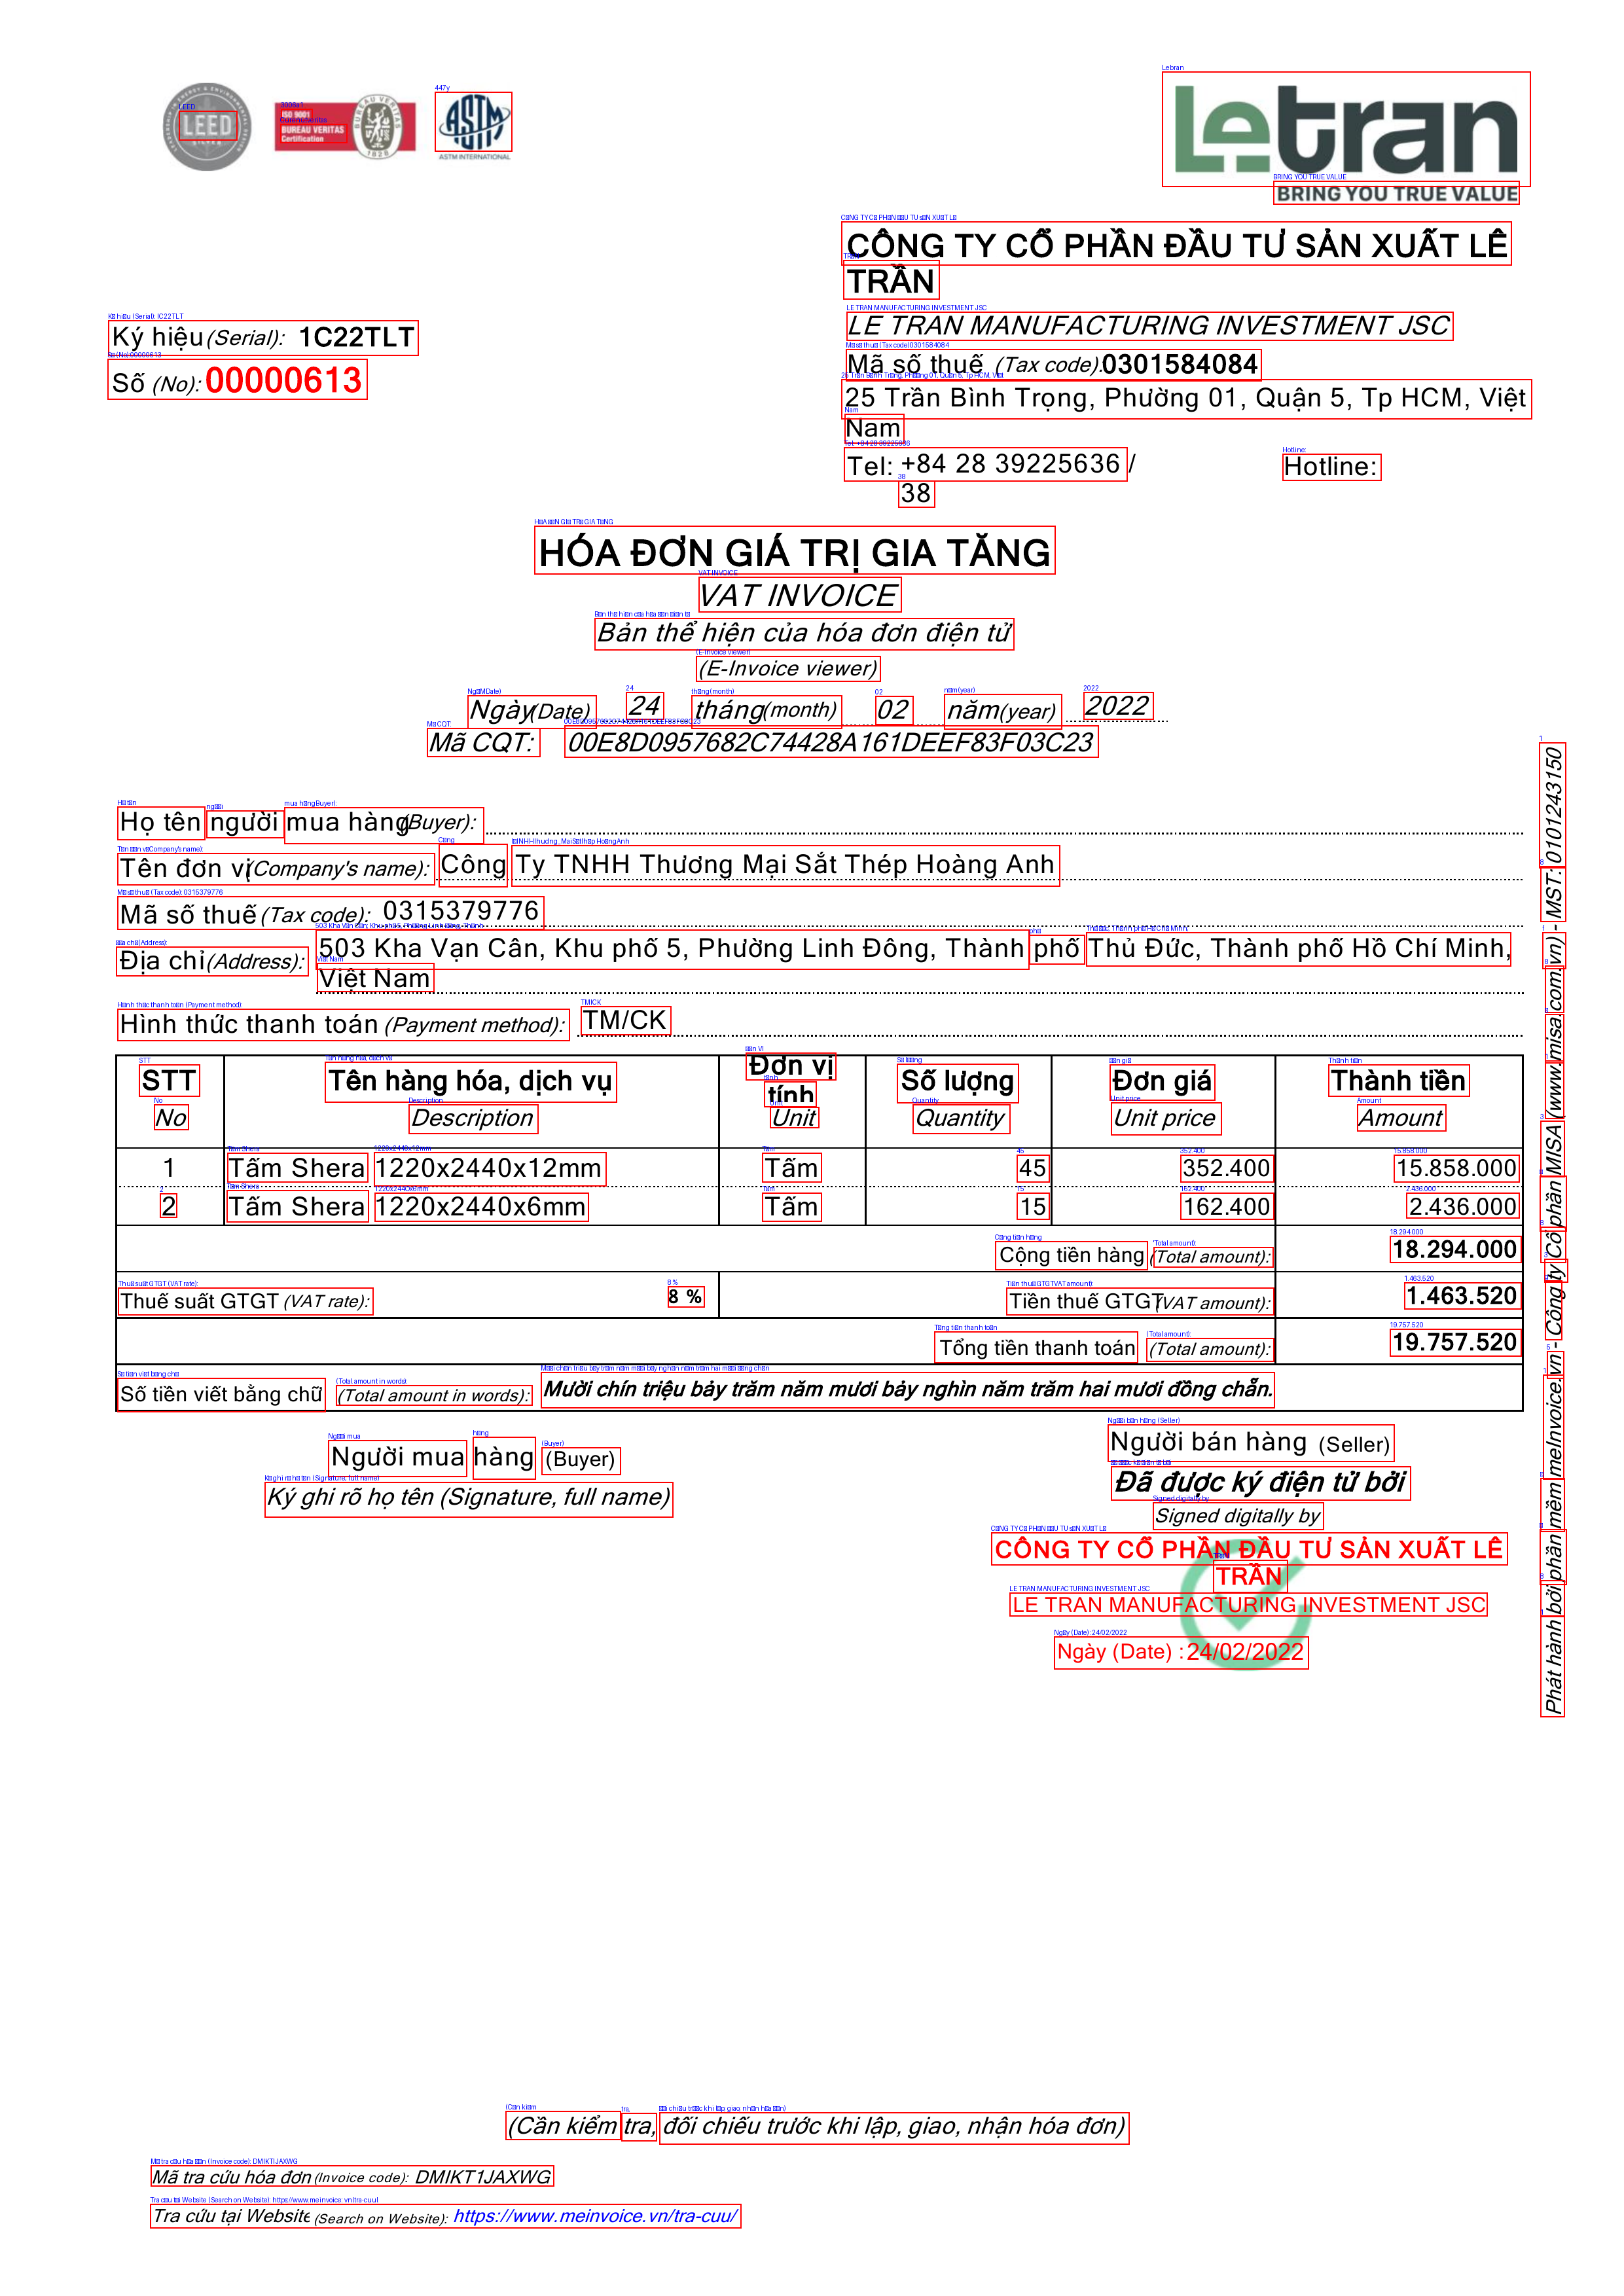

In [1]:
from PIL import Image, ImageDraw, ImageFont
import json

# File ảnh và OCR output (bạn đổi qua pytesseract hoặc easyocr tùy ý)
IMAGE_PATH = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/converted_pngs/1C22TLT_00000613.png"
OCR_JSON= "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Qhuy_data/easyOCR/1C22TLT_00000613.json"

# Mở ảnh gốc
img = Image.open(IMAGE_PATH)
draw = ImageDraw.Draw(img)

# Load kết quả OCR
with open(OCR_JSON, "r", encoding="utf-8") as f:
    tokens = json.load(f)

# Vẽ bbox và text lên ảnh
for token in tokens:
    bbox = token["bbox"]
    text = token["text"]
    draw.rectangle(bbox, outline="red", width=2)
    draw.text((bbox[0], bbox[1] - 12), text, fill="blue")

# Hiển thị ảnh (trong Jupyter hoặc lưu ra file)
img.show()  # hoặc img.save("visualized_output.png")
